In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc)

In [2]:
#Import csv file
mdf= pd.read_csv('/Users/robertpatton/Desktop/Desktop - Robert’s MacBook Pro/D208 /D208_task2_clean.csv', index_col=0)

In [3]:
#Examine data info
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ReAdmis                 10000 non-null  int64  
 1   Children                10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Income                  10000 non-null  float64
 4   VitD_levels             10000 non-null  float64
 5   Doc_visits              10000 non-null  int64  
 6   vitD_supp               10000 non-null  int64  
 7   HighBlood               10000 non-null  int64  
 8   Stroke                  10000 non-null  int64  
 9   Overweight              10000 non-null  int64  
 10  Arthritis               10000 non-null  int64  
 11  Diabetes                10000 non-null  int64  
 12  Hyperlipidemia          10000 non-null  int64  
 13  BackPain                10000 non-null  int64  
 14  Anxiety                 10000 non-null 

In [4]:
#Examine if missing values exist
mdf.isnull().sum()

ReAdmis                   0
Children                  0
Age                       0
Income                    0
VitD_levels               0
Doc_visits                0
vitD_supp                 0
HighBlood                 0
Stroke                    0
Overweight                0
Arthritis                 0
Diabetes                  0
Hyperlipidemia            0
BackPain                  0
Anxiety                   0
Allergic_rhinitis         0
Reflux_esophagitis        0
Asthma                    0
Initial_days              0
_Emergency Admission      0
_Observation Admission    0
Risk_Low                  0
Risk_Medium               0
_Male                     0
_Nonbinary                0
dtype: int64

In [5]:
#Examine if duplicate value exist
mdf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
#Define dependent and predictor variables
X=mdf.drop(columns='ReAdmis')
y=mdf['ReAdmis']
X,y

(      Children  Age    Income  VitD_levels  Doc_visits  vitD_supp  HighBlood  \
 0            1   53  86575.93    19.141466           6          0          1   
 1            3   51  46805.99    18.940352           4          1          1   
 2            3   53  14370.14    18.057507           4          0          1   
 3            0   78  39741.49    16.576858           4          0          0   
 4            1   22   1209.56    17.439069           5          2          0   
 ...        ...  ...       ...          ...         ...        ...        ...   
 9995         2   25  45967.61    16.980860           4          1          1   
 9996         4   87  14983.02    18.177020           5          0          1   
 9997         3   45  65917.81    17.129070           4          0          1   
 9998         3   43  29702.32    19.910430           5          1          0   
 9999         8   70  62682.63    18.388620           5          1          0   
 
       Stroke  Overweight 

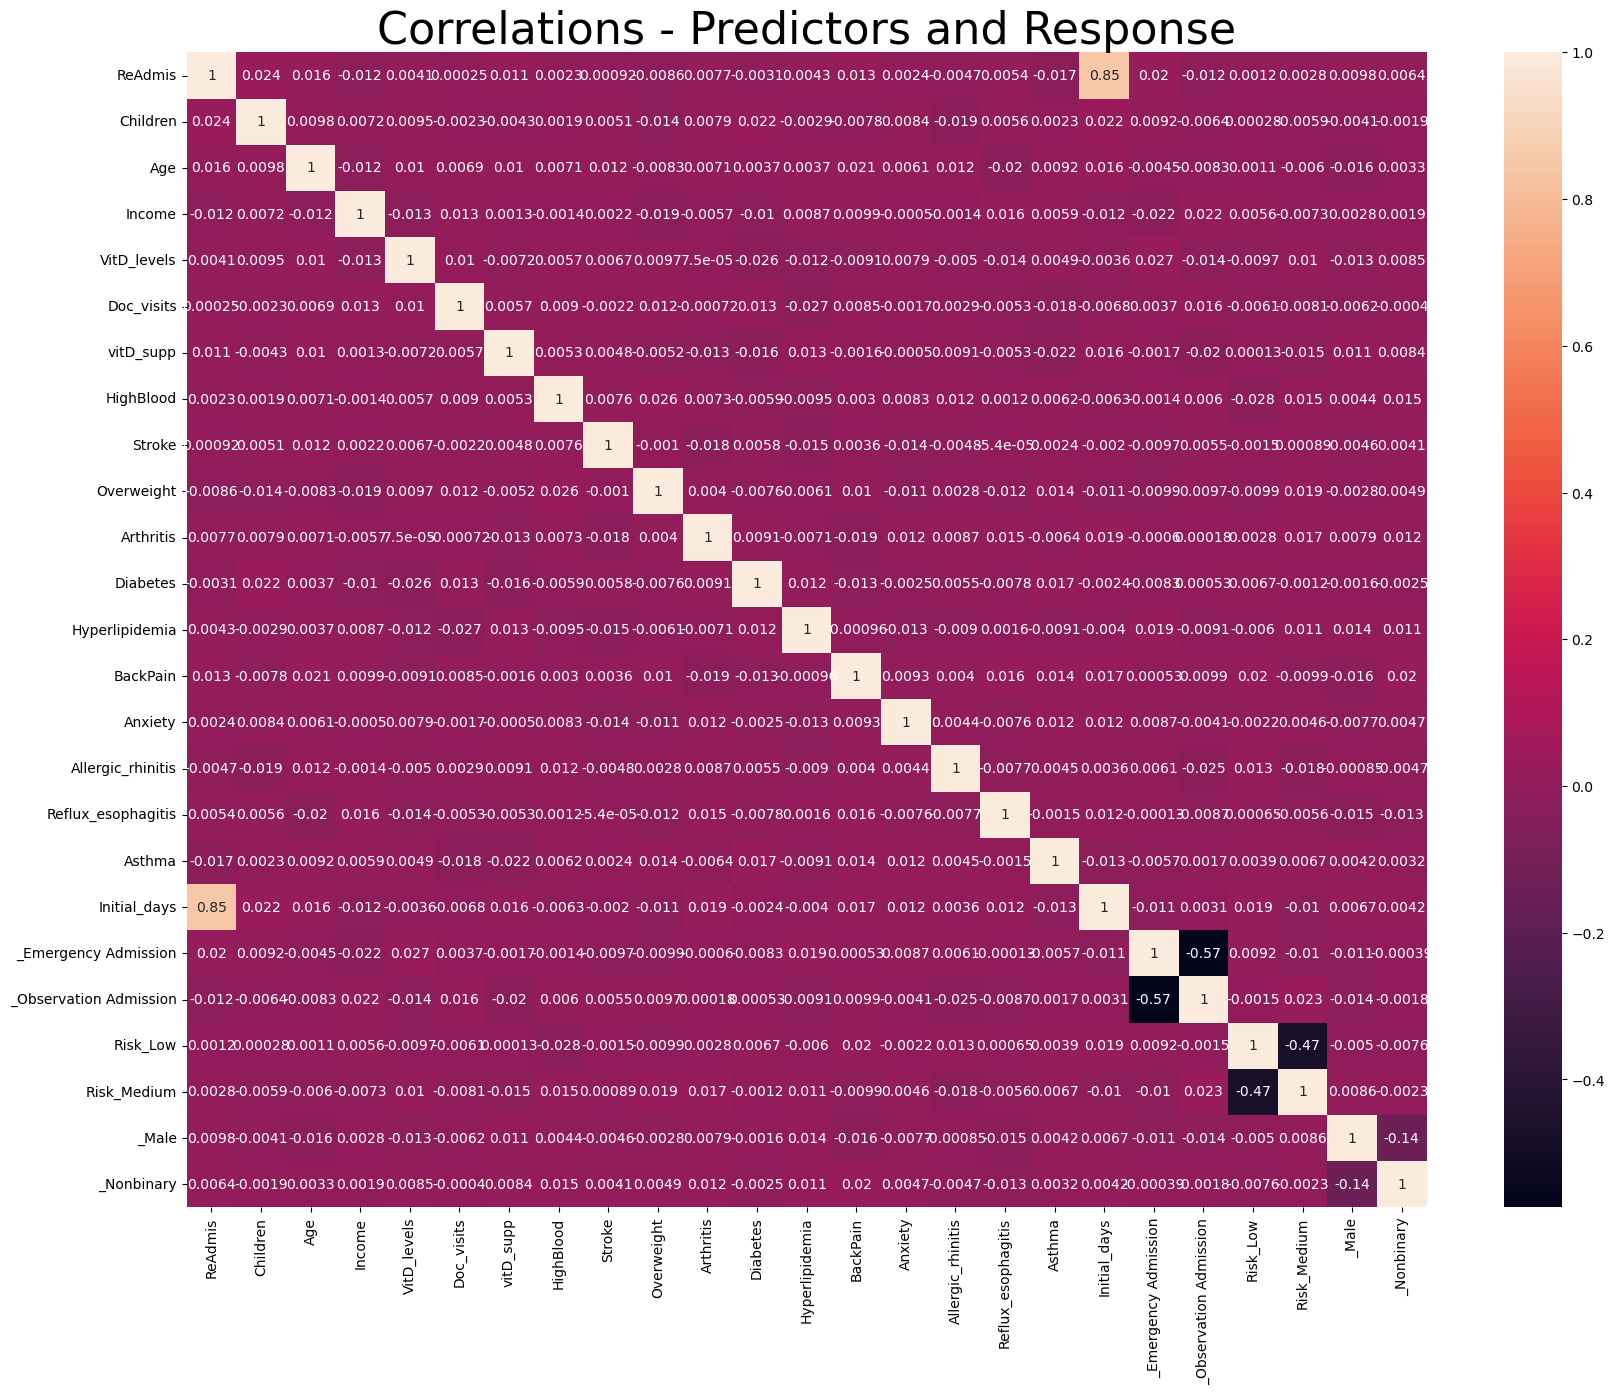

In [7]:
#Look for correlation in variables with heat map
coorl= mdf.corr()
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(coorl, annot=True, ax=ax)
plt.title("Correlations - Predictors and Response",fontsize=32)
plt.show()

In [8]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [9]:
#Train the model with the naive bayes classification method
mdf_clf=MultinomialNB(force_alpha=True)
mdf_clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [10]:
#Evaluate the model and get classification report
y_pred=mdf_clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score = {score * 100:.2f}%)")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred)* 100:.3f}%")
print(f"Specificity: {recall_score(y_test, y_pred, pos_label=0) * 100:.3f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100: .3f}%")

Accuracy Score = 79.30%)
Recall (Sensitivity): 84.574%
Specificity: 76.180%
Precision:  67.744%


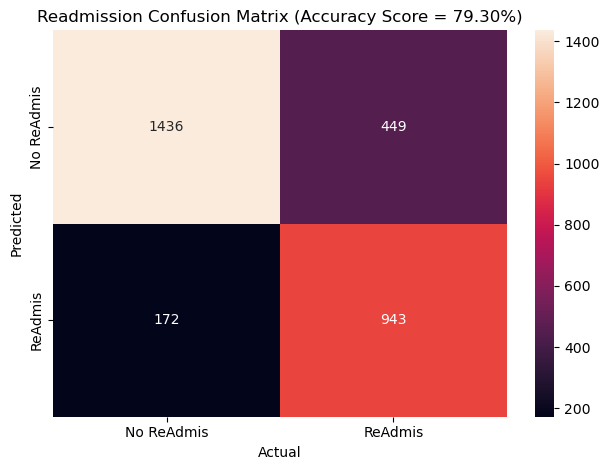

In [11]:
#Create confusion matrix visual
score = accuracy_score(y_test, y_pred)
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title(f"Readmission Confusion Matrix (Accuracy Score = {score * 100:.2f}%)")
ax.xaxis.set_ticklabels(['No ReAdmis', 'ReAdmis'])
ax.yaxis.set_ticklabels(['No ReAdmis', 'ReAdmis'])
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.tight_layout()
plt.show()

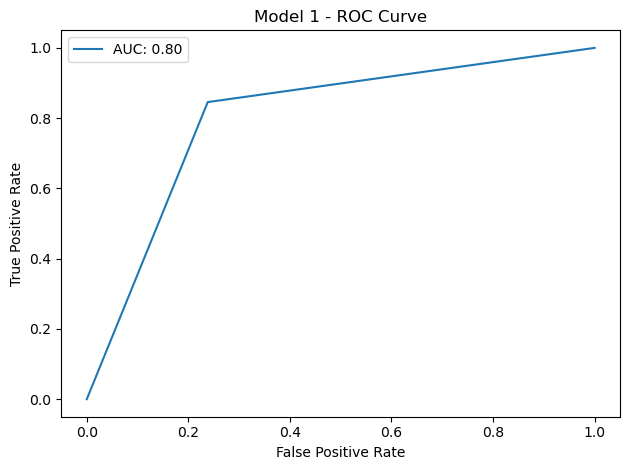

In [12]:
#Examine ROC curve and determine AUC of model performance
fpr, tpr, _ = roc_curve(y_test, y_pred)
ax = sns.lineplot(x=fpr, y=tpr, label=f"AUC: {auc(fpr, tpr):.2f}")
plt.title("Model 1 - ROC Curve")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.tight_layout()
plt.show()

In [13]:
#Export files to CSV
mdf.to_csv('/Users/robertpatton/Desktop/D209.csv', index=False)
X_train.to_csv('/Users/robertpatton/Desktop/X_train.csv', index=False)
X_test.to_csv('/Users/robertpatton/Desktop/X_test.csv', index=False)
y_train.to_csv('/Users/robertpatton/Desktop/y_train.csv', index=False)
y_test.to_csv('/Users/robertpatton/Desktop/y_test.csv', index=False)